## **Analýza lékařského datasetu**

V mém projektu se chystám prozkoumat dataset dat věnovaný srdečnímu selhání pacientů.

## **Formulace problému**

Srdeční selhání (SS) je hlavní příčinou úmrtí číslo 1 na celém světě, přičemž ročně způsobí přibližně 17,9 milionu úmrtí, což představuje 31% všech úmrtí na světě. Více než 3 z 5 úmrtí na srdeční selhání jsou spojeny s průměrnými nástroji a přístupy, a více než třetina těchto úmrtí nastává neočekávaně u lidí ve věku nad 70 let. Nedostatečná přesnost je rozšířeným problémem, způsobeným srdečními selháními, a tento dataset obsahuje 11 znaků, které lze použít k předpovídání možného srdečního onemocnění.

Lidé se srdečním selháním nebo s vysokým srdečním rizikem (kvůli nedostatku několika rizikových faktorů, jako jsou genetika, dieta, předchozí nemoci nebo stávající zdravotní stav) potřebují včasné vyhodnocení a léčbu, ve které může analyza a model strojového učení poskytnout značnou pomoc.

## **Dataset**

[Dataset Link](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/code?datasetId=1582403&searchQuery=py)
- Age: věk pacienta [roky]
- Sex: pohlaví pacienta [M: Mužské, Ž: Ženské]
- ChestPainType: typ bolesti v hrudi [TA: typická angina, ATA: atypická angina, NAP: neanginální bolest, ASY: asymptomatický]
- RestingBP: krevní tlak v klidu [mm rt. sl.]
- Cholesterol: hladina cholesterolu [mmol/dl]
- FastingBS: hladina cukru v krvi nalačno [1: if FastingBS > 120 mg/dl, 0: jinak]
- RestingECG: výsledky elektrokardiogramu v klidu [normální: normální, ST: ST-T vlna abnormalita, LVH: hypertrofie levé komory]
- MaxHR: maximální dosažená srdeční frekvence [číselné hodnoty od 60 do 202]
- ExerciseAngina: [Ano, Ne]
- Oldpeak: ST deprese vyvolaná cvičením v porovnání s klidem [číselné hodnoty, měřené v depresích]
- ST_Slope: the slope of the peak exercise ST segment [vzestupný, plochý, sestupný]
- HeartDisease: výsledný stav srdce [1: přítomno, 0: nepřítomno]

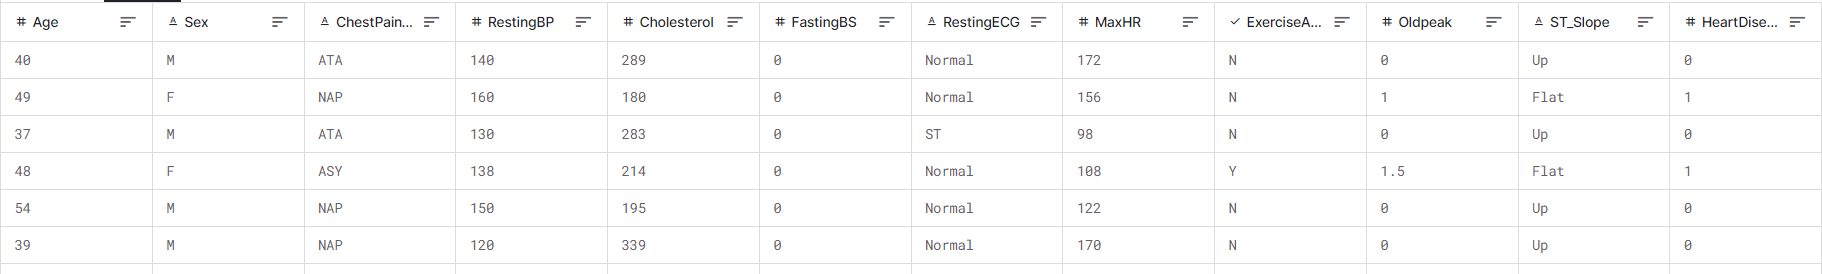

## Importing required packages

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset

In [22]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [23]:
df.shape

(918, 12)

## Data Cleaning

In [19]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

**There are no NaN values**

In [20]:
df.duplicated().sum()

0

**There are no Duplicate values in the dataset**

## **EDA**

In [24]:
# changing M, F to Male, Female
df["Sex"] = df["Sex"].map({"M": "Male", "F": "Female"})
df["Sex"]
# changing HeartDisease from 0, 1 to No, Yes
df["HeartDisease"] = df["HeartDisease"].map({0: "No", 1: "Yes"})
df["HeartDisease"]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 86.2+ KB


In [37]:
# checking true percent of male/female
sex_pct_counts = df["Sex"].value_counts(normalize=True).round(2) * 100
sex_pct_counts = sex_pct_counts.reset_index().rename(columns={"Sex": "Sex", "proportion": "Pct"})
sex_pct_counts

,Sex,Pct
0,Male,79.0
1,Female,21.0


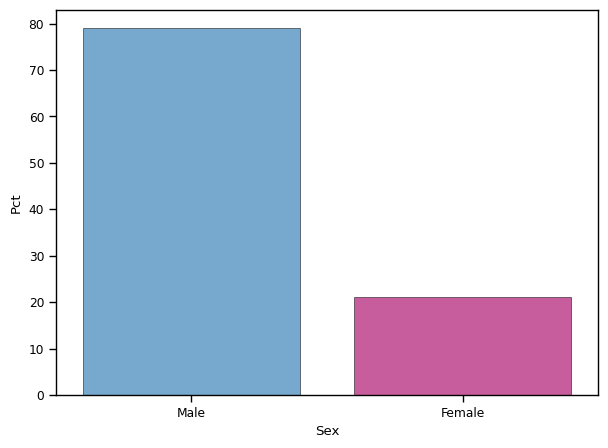

In [42]:
plt.figure(figsize=(7, 5))
sns.set_context("paper")
sex_color = dict({"Male": "#2986cc", "Female": "#c90076"})
ax1 = sns.barplot(
    data=sex_pct_counts,
    x="Sex",
    y="Pct",
    palette=sex_color,
    hue='Sex',
    linewidth=0.5,
    edgecolor="black",
    alpha=0.7
)
plt.show()

      Sex HeartDisease  Count
0  Female           No    143
1  Female          Yes     50
2    Male           No    267
3    Male          Yes    458


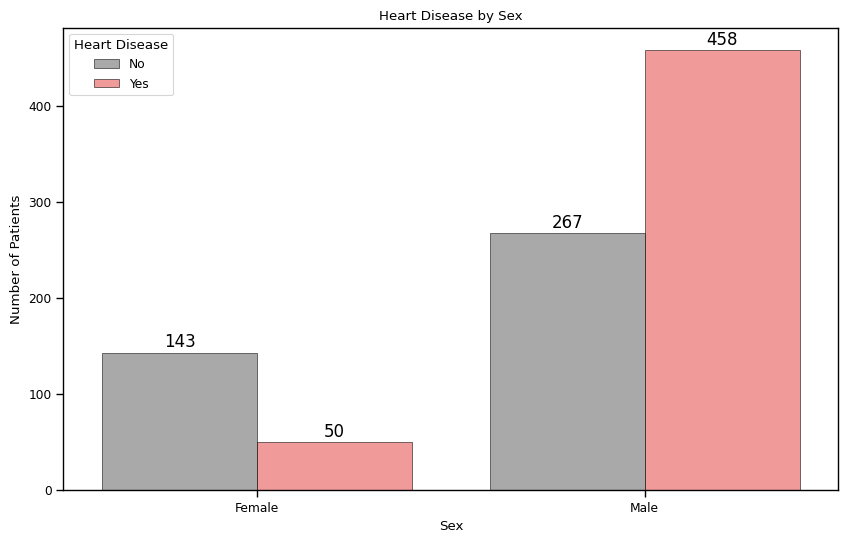

In [128]:
summary_table = df.groupby(['Sex', 'HeartDisease']).size().reset_index(name='Count')
print(summary_table)

total_counts = df['Sex'].value_counts().reset_index()
total_counts.columns = ['Sex', 'TotalCount']
summary_table = summary_table.merge(total_counts, on='Sex')
# print(summary_table)

heart_disease_hue_colors = dict({"No": "#8c8c8c", "Yes": "#ff6666"})

plt.figure(figsize=(10, 6))
sns.set_context("paper")
ax = sns.barplot(
    data=summary_table,
    x="Sex",
    y="Count",
    hue="HeartDisease",
    palette=heart_disease_hue_colors,
    linewidth=0.5,
    edgecolor="black",
    alpha=0.75
)

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 4), textcoords='offset points')

plt.title('Heart Disease by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Patients')
plt.legend(title='Heart Disease')
plt.show()

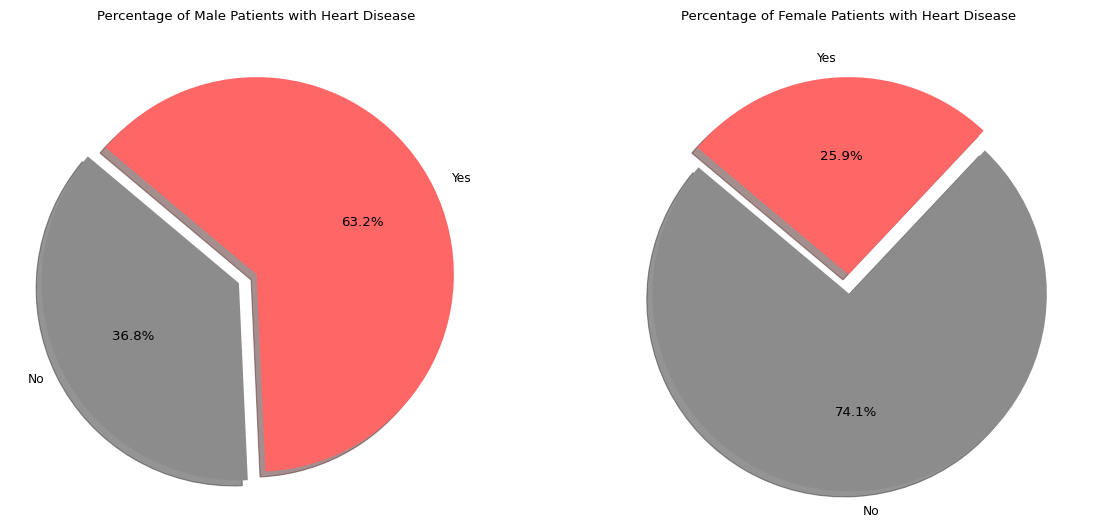

In [127]:
male_data = summary_table[summary_table['Sex'] == 'Male']
female_data = summary_table[summary_table['Sex'] == 'Female']

male_labels = male_data['HeartDisease']
male_sizes = male_data['Percentage']
male_colors = ['#8c8c8c', '#ff6666'] 
male_explode = (0.1, 0)

female_labels = female_data['HeartDisease']
female_sizes = female_data['Percentage']
female_colors = ['#8c8c8c', '#ff6666']
female_explode = (0.1, 0)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.pie(male_sizes, explode=male_explode, labels=male_labels, colors=male_colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Male Patients with Heart Disease')

plt.subplot(1, 2, 2)
plt.pie(female_sizes, explode=female_explode, labels=female_labels, colors=female_colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Female Patients with Heart Disease')

plt.show()

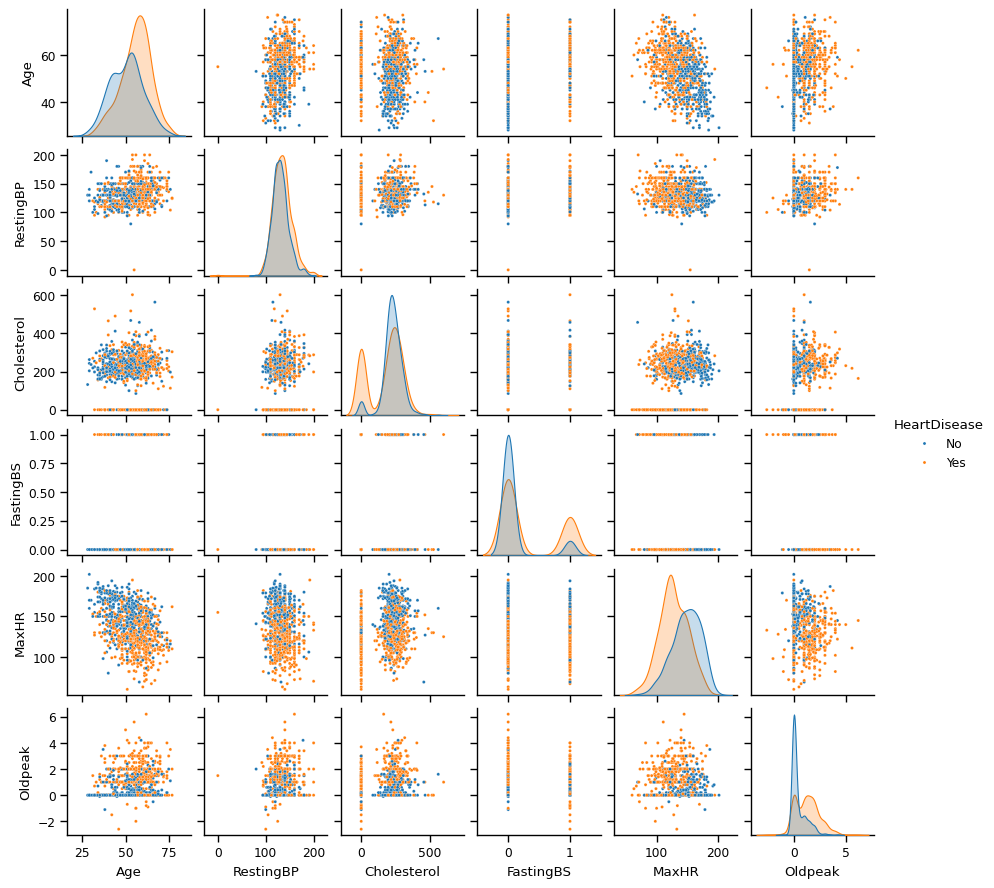

In [45]:
sns.pairplot(
    df,
    hue="HeartDisease",
    kind="scatter",
    diag_kind="kde",
    height=1.5,
    aspect=1,
    plot_kws=dict(s=5)
)
plt.show()

<Axes: >

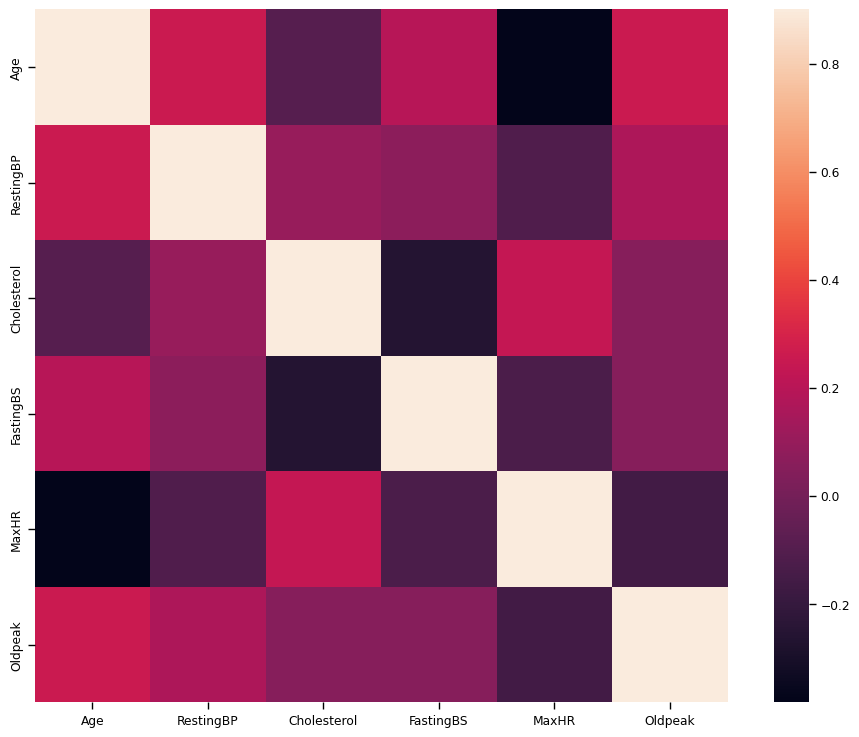

In [67]:
corr_matrix = df.corr(method='pearson', numeric_only=True)
plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=0.9, square=True)

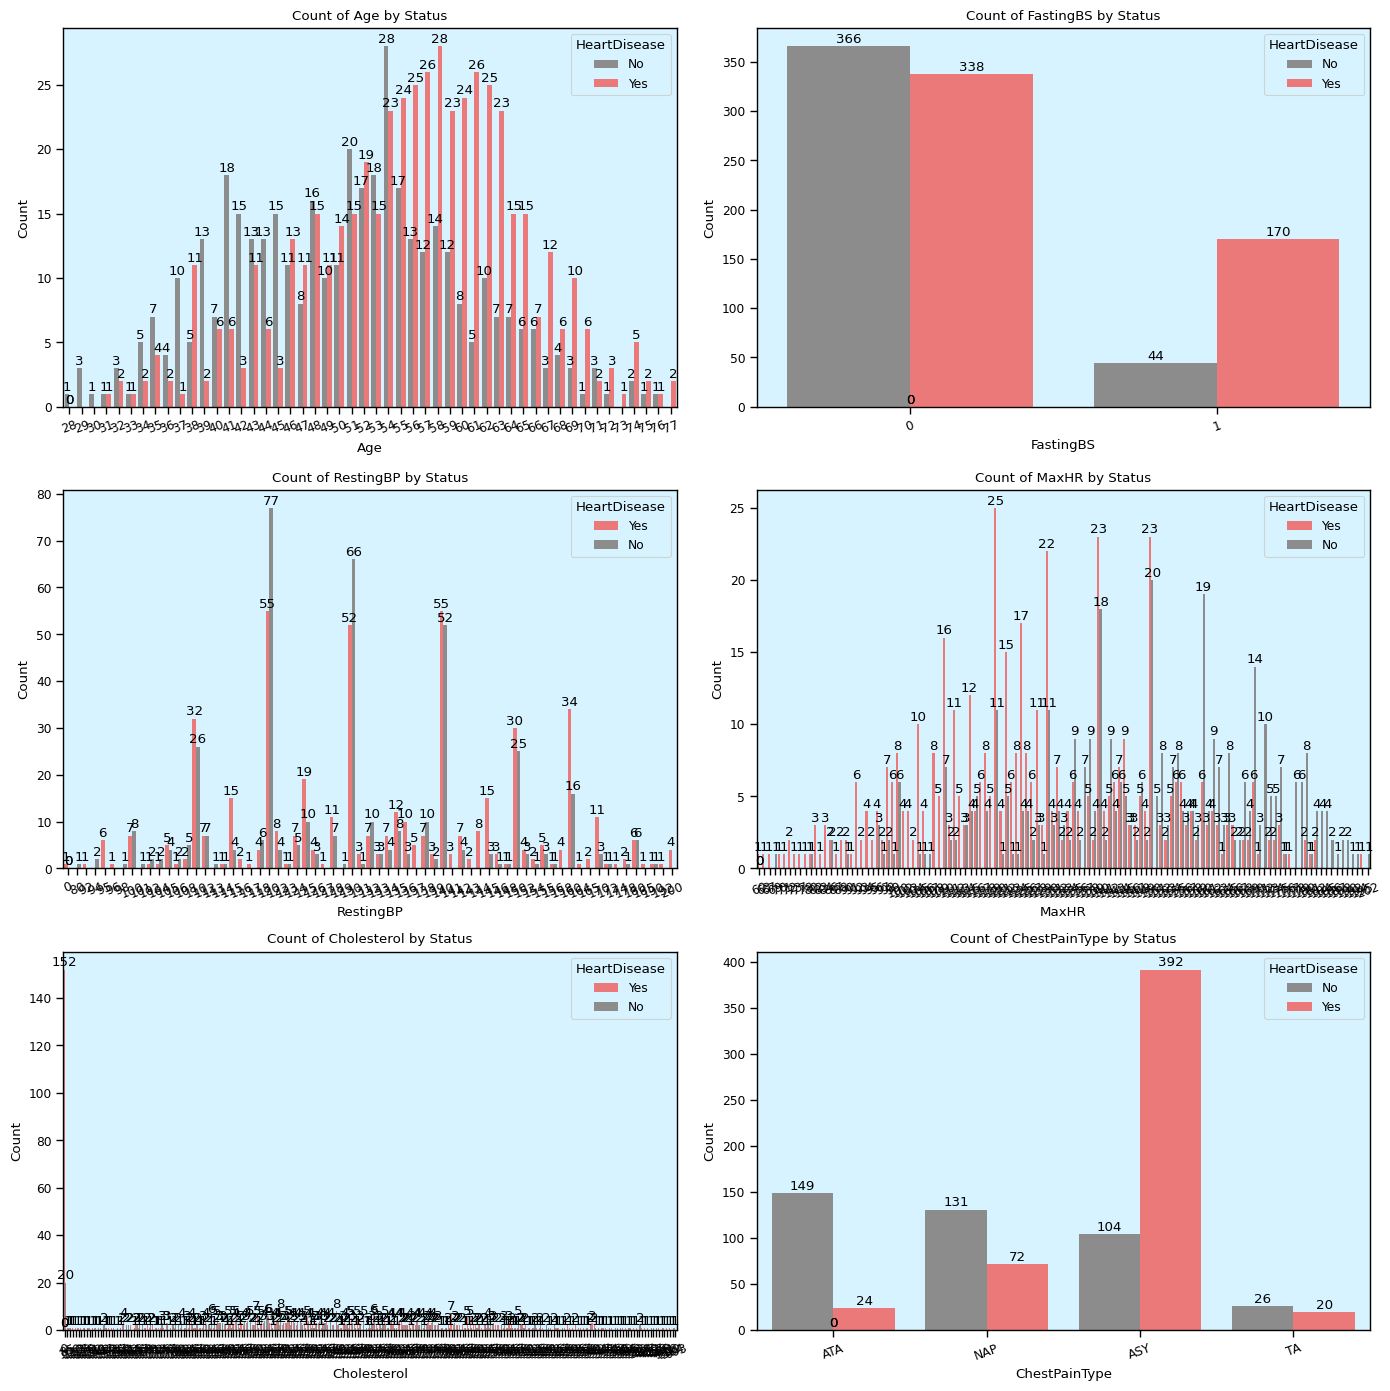

In [188]:
categorical_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'ChestPainType']

num_features = len(categorical_features)
num_rows = min(num_features, 3)
num_cols = (num_features - 1) // 3 + 1

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(14, 14))

for i, feature in enumerate(categorical_features):
    row = i % 3
    col = i // 3
    ax = axes[row, col]

    sns.countplot(data=df, x=feature, hue='HeartDisease', ax=ax, palette=heart_disease_hue_colors)
    ax.set_title(f'Count of {feature} by Status')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=20)

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points',
                    color='black')

for i in range(num_rows):
    for j in range(num_cols):
        if j * 3 + i >= num_features:
            fig.delaxes(axes[i, j])

plt.tight_layout()
plt.show()

In [153]:
dfCopy = df
def box_hist_plot(feature):
    plt.rcParams['axes.facecolor'] = '#D6F3FF'

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

    sns.histplot(dfCopy[feature], kde=True, color='#45b1e8', ax=axes[0])

    mean_value = dfCopy[feature].mean()
    median_value = dfCopy[feature].median()
    mode_value = dfCopy[feature].mode().values[0] 
    std_value = dfCopy[feature].std()
    min_value = dfCopy[feature].min()
    max_value = dfCopy[feature].max()

    axes[0].axvline(mean_value, color='b', linestyle='-', linewidth=2, label=f'Mean: {mean_value:.2f}')
    axes[0].axvline(median_value, color='r', linestyle='-', linewidth=2, label=f'Median: {median_value:.2f}')
    axes[0].axvline(mode_value, color='m', linestyle='-', linewidth=2, label=f'Mode: {mode_value:.2f}')
    axes[0].axvline(mean_value + std_value, color='b', linestyle='dashed', linewidth=2, label=f'Std +: {std_value:.2f}')
    axes[0].axvline(mean_value - std_value, color='b', linestyle='dashed', linewidth=2, label=f'Std -: {std_value:.2f}')
    axes[0].axvline(min_value, color='orange', linestyle='--', linewidth=2, label=f'Min: {min_value:.2f}')
    axes[0].axvline(max_value, color='orange', linestyle='--', linewidth=2, label=f'Max: {max_value:.2f}')

    axes[0].set_title(f"Histogram")
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel("Density")
    axes[0].legend()

    sns.boxplot(x=dfCopy[feature], ax=axes[1], color='#45b1e8')
    axes[1].axvline(mean_value, color='b', linestyle='-', linewidth=2)
    axes[1].axvline(median_value, color='r', linestyle='-', linewidth=2)
    axes[1].axvline(mode_value, color='m', linestyle='-', linewidth=2)
    axes[1].axvline(mean_value + std_value, color='b', linestyle='dashed', linewidth=2)
    axes[1].axvline(mean_value - std_value, color='b', linestyle='dashed', linewidth=2)
    axes[1].axvline(min_value, color='orange', linestyle='--', linewidth=2)
    axes[1].axvline(max_value, color='orange', linestyle='--', linewidth=2)
    axes[1].set_title("Box Plot")
    axes[1].set_xlabel(feature)

    plt.tight_layout()
    plt.show()

def bar_donut_chart(variable):
    colors = ['#6CB4EE', '#318CE7', '#6495ED', '#87CEFA'] 

    category_counts = dfCopy[variable].value_counts()

    fig, axs = plt.subplots(1, 2, figsize=(14, 4)) 

    bars = axs[0].barh(category_counts.index, category_counts.values, color=colors)
    axs[0].set_title(f'{variable} Distribution', fontsize=16)
    axs[0].set_xlabel('Count')
    axs[0].set_ylabel(f'{variable} Types')

    for bar, value in zip(bars, category_counts.values):
        width = bar.get_width()
        axs[0].text(width, bar.get_y() + bar.get_height() / 2, '%d' % int(width),
                    ha='left', va='center', color='black', fontsize=10)

    status_counts = dfCopy[variable].value_counts()

    wedges, texts, autotexts = axs[1].pie(status_counts, labels=status_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)

    centre_circle = plt.Circle((0,0),0.70,fc='white')
    plt.gca().add_artist(centre_circle)

    axs[1].axis('equal')

    plt.tight_layout()
    plt.show()

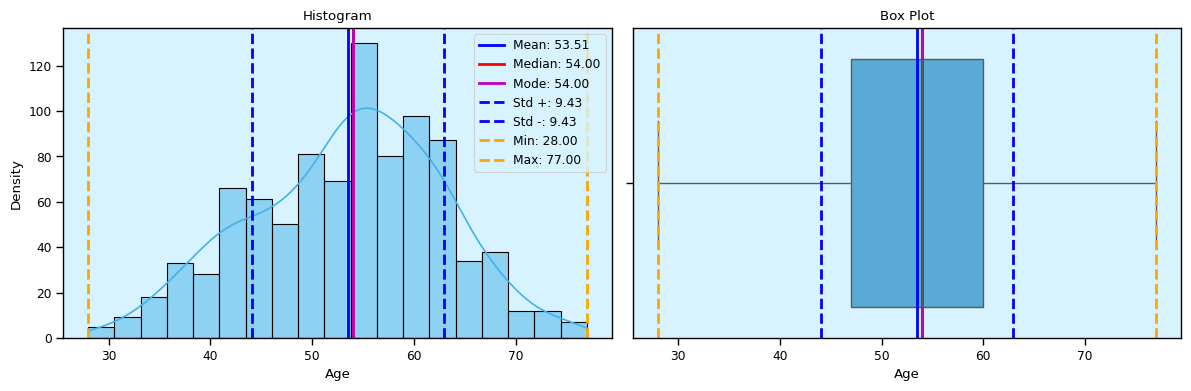

In [154]:
box_hist_plot("Age")

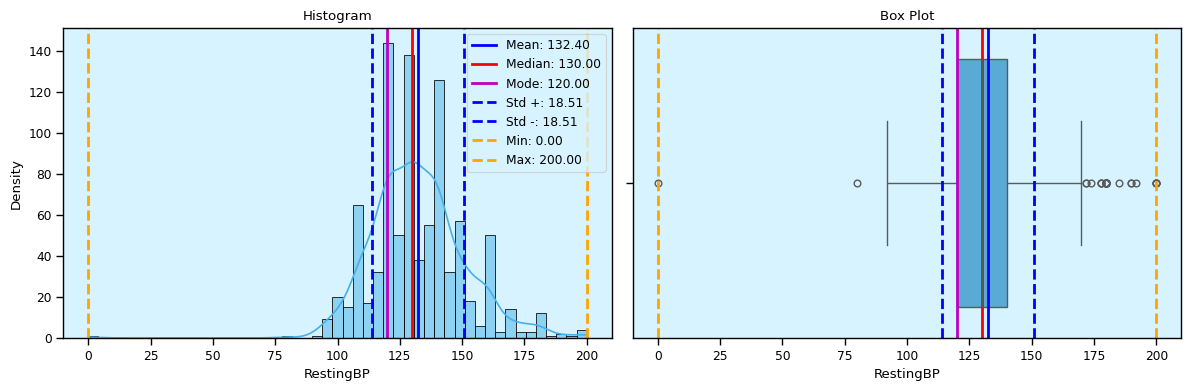

In [155]:
box_hist_plot("RestingBP")

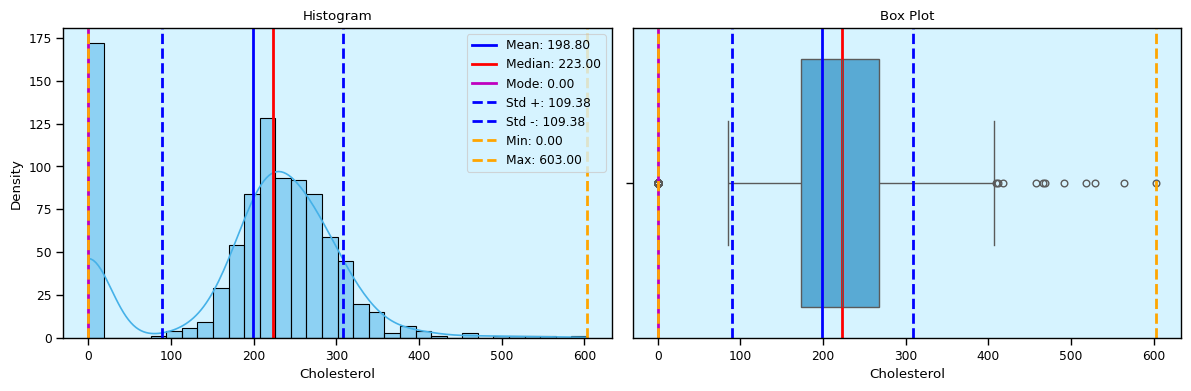

In [156]:
box_hist_plot("Cholesterol")

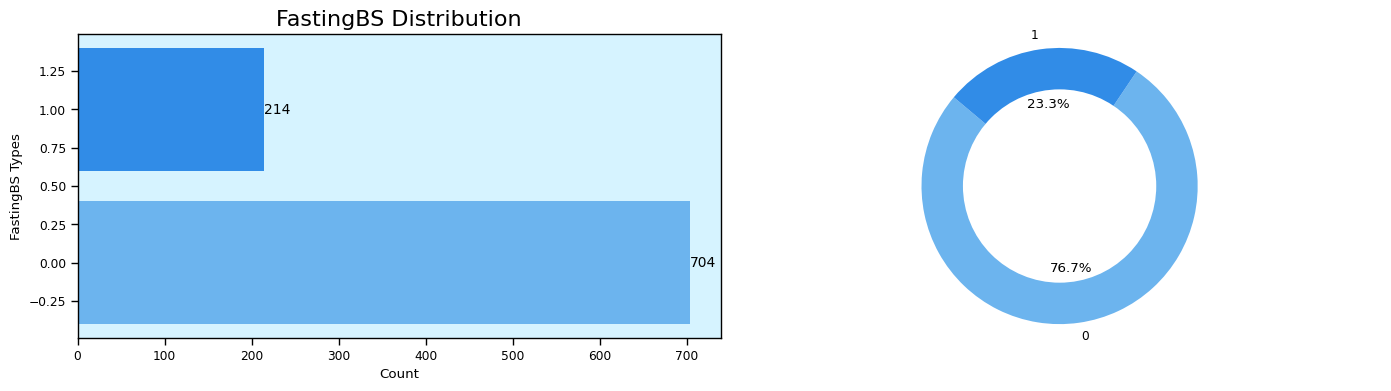

In [157]:
bar_donut_chart("FastingBS")

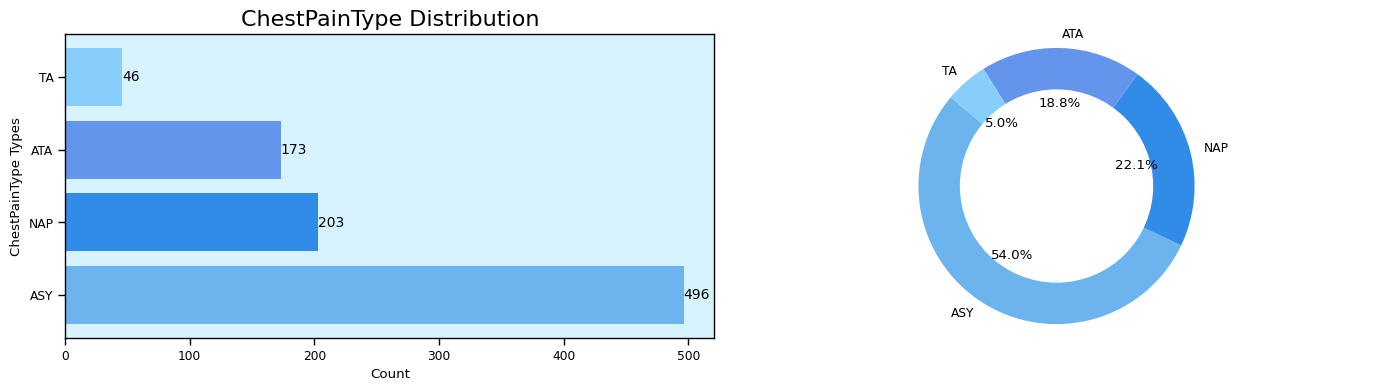

In [158]:
bar_donut_chart("ChestPainType")

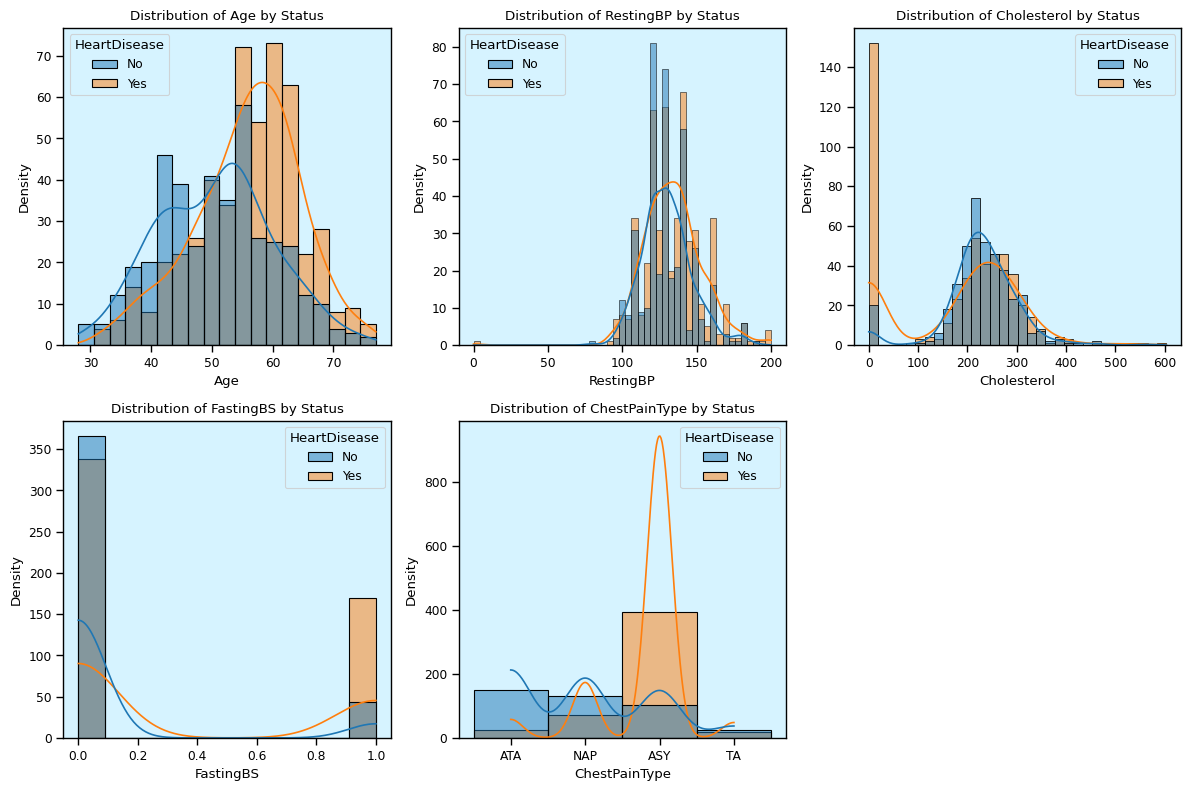

In [173]:
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'ChestPainType']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.histplot(data=dfCopy, x=feature, hue='HeartDisease',  kde=True, fill=True, ax=ax)
    ax.set_title(f'Distribution of {feature} by Status')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')

axes[1, 2].remove()

plt.tight_layout()
plt.show()

## **Zjištění Z Analýzy**

- Potvrzena hypotéza, že nemocemi srdečního selhání trpí převážně muži.
  Při procentuálním poměru mužů v tabulce je 79 procent onemocnění u mužů 63,2, zatímco u žen je tato hodnota rovna 25,9
- Byla provedena analýza , aby se zjistilo, jaké faktory ovlivňují srdeční selhání
  1. S věkem se zvyšuje pravděpodobnost onemocnění, zvláště náchylní k onemocnění jsou rizikoví pacienti s věkem 50+
  2. Navzdory určitému nárůstu srdeční frekvence při zvýšení krevního tlaku není tento nárůst významný. To může naznačovat, že ačkoli je zvýšený krevní tlak jedním z rizikových faktorů, není jediným a rozhodujícím faktorem v tomto souboru dat.
  3. Zjištění cholesterolu zdůrazňují potřebu multidimenzionálního přístupu ve výzkumu a prevenci srdečních onemocnění, přičemž uznávají, že kontrola jednoho rizikového faktoru, jako je hladina cholesterolu, by měla být doprovázena kontrolou a dalšími faktory, aby byla maximální účinnost.
  4. Dochází k výraznému zvýšení frekvence srdečních onemocnění se zvýšenou hladinou cukru v krvi. To naznačuje, že hyperglykémie (zvýšená hladina cukru) je významným rizikovým faktorem pro rozvoj srdečních onemocnění. Vysoká hladina cukru v krvi může poškodit krevní cévy a přispět k rozvoji aterosklerózy, což zvyšuje riziko srdečních onemocnění.
  5. Analýza ukázala, že téměř 50% případů srdečních onemocnění je asymptomatických. To znamená, že značný počet pacientů nemusí pociťovat zjevné příznaky navzdory přítomnosti závažného onemocnění. Asymptomatický průběh srdečních onemocnění je významnou hrozbou, protože takoví pacienti nemusí vyhledat lékařskou pomoc včas, což zvyšuje riziko náhlých a závažných komplikací, jako je infarkt myokardu nebo náhlá srdeční smrt.
- Srdeční onemocnění se obvykle vyvíjejí pod vlivem mnoha faktorů, včetně genetické predispozice, hladiny cholesterolu, životního stylu, přítomnosti dalších onemocnění atd. Je nutné provádět komplexní lékařská vyšetření a zvážit všechny druhy rizikových faktorů, aby byla zajištěna účinná prevence a léčba srdečních onemocnění.

Tato zjištění zdůrazňují potřebu multidimenzionálního přístupu ve výzkumu a prevenci srdečních onemocnění, přičemž uznávají, že kontrola jednoho rizikového faktoru musí být doprovázena kontrolou a dalšími faktory, aby byla maximalizována účinnost.